In [1]:
import os
import numpy as np
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax




2025-11-23 22:30:16.118705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763937016.525370      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763937016.654895      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
# data_path="/kaggle/input/brain-mri-images-for-brain-tumor-detection"
data_path1='/kaggle/input/brain-tumor-multimodal-image-ct-and-mri/Dataset/Brain Tumor MRI images'

In [3]:
data_train_gen = ImageDataGenerator(
    rescale=1./255,          
    rotation_range=20,       
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    shear_range=0.15,       
    zoom_range=0.15,         
    horizontal_flip=True,   
    fill_mode='nearest', 
    validation_split=0.1  
)

In [4]:
train_data = data_train_gen.flow_from_directory(
    data_path1,
    target_size=(128, 128),
    batch_size=34,
    class_mode='categorical',
    subset='training',
    # color_mode='rgb'
    color_mode='grayscale' 
)

Found 4500 images belonging to 2 classes.


In [5]:
val_data = data_train_gen.flow_from_directory(
    data_path1,
    target_size=(128, 128),
    batch_size=34,
    class_mode='categorical',
    subset='validation',
    # color_mode='rgb',
    color_mode='grayscale', 
)

Found 500 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(256, (3,3), input_shape=(128,128,1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(265, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763937045.902175      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763937045.902869      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 256)  │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 265)    │     1,221,385 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 265)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 265)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       305,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,004,619 (11.46 MB)

 Trainable params: 3,004,619 (11.46 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
early=EarlyStopping(monitor='val_loss',patience=5)

In [8]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics=['accuracy'])


In [9]:
history=model.fit(train_data,batch_size=10,callbacks=early,epochs=50,validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1763937050.913388     127 service.cc:148] XLA service 0x7ec2d0002dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763937050.914889     127 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763937050.914913     127 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763937051.369189     127 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763937069.192268     127 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


133/133 ━━━━━━━━━━━━━━━━━━━━ 90s 527ms/step - accuracy: 0.5987 - loss: 0.6611 - val_accuracy: 0.7180 - val_loss: 0.5564
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 201ms/step - accuracy: 0.8040 - loss: 0.4552 - val_accuracy: 0.7440 - val_loss: 0.4896
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - accuracy: 0.8356 - loss: 0.4030 - val_accuracy: 0.8100 - val_loss: 0.4438
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 205ms/step - accuracy: 0.8612 - loss: 0.3597 - val_accuracy: 0.8020 - val_loss: 0.3836
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.8672 - loss: 0.3362 - val_accuracy: 0.8120 - val_loss: 0.4004
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 206ms/step - accuracy: 0.8817 - loss: 0.2941 - val_accuracy: 0.8620 - val_loss: 0.2927
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 206ms/step - accuracy: 0.8874 - loss: 0.2903 - val_accuracy: 0.8740 - val_loss: 0.2891
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 205ms/step - accuracy: 0.8983 - loss: 0.2655 - val

In [10]:
test_loss, test_acc = model.evaluate(val_data, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9390 - loss: 0.1604

Test Accuracy: 0.9200
Test Loss: 0.1920


In [12]:
# 1. Full Model Save
model.save('final_brain_tumor_model.keras')

# 2. Sirf Weights Save (CORRECTED NAME)
# Humne naam change kar ke '.weights.h5' kar diya hai
model.save_weights('final_brain_tumor_weights.weights.h5')

print("✅ Model aur Weights dono save ho gaye hain!")
print(f"Classes: {train_data.class_indices}")

✅ Model aur Weights dono save ho gaye hain!
Classes: {'Healthy': 0, 'Tumor': 1}


Preparing Validation Data for Report...
Found 500 images belonging to 2 classes.
Generating Predictions...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step

Final Accuracy: 93.00%

--- Classification Report ---
              precision    recall  f1-score   support

     Healthy       0.99      0.83      0.90       200
       Tumor       0.90      1.00      0.94       300

    accuracy                           0.93       500
   macro avg       0.95      0.91      0.92       500
weighted avg       0.94      0.93      0.93       500



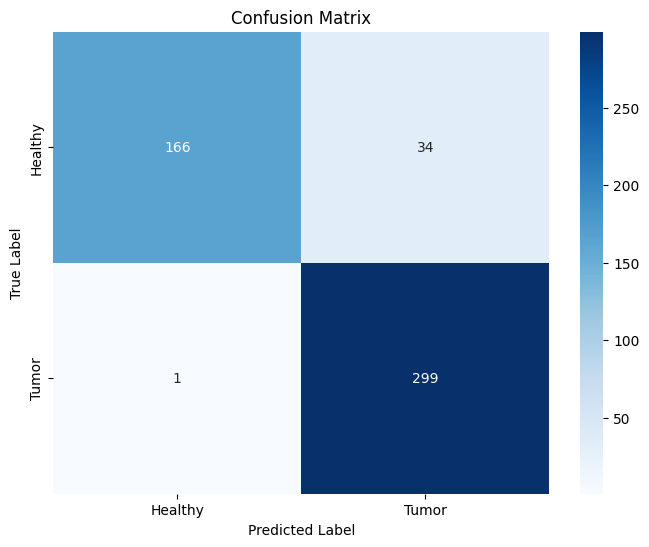

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Step 1: Validation Data ko 'Shuffle=False' ke sath reload karein ---
# Ye bohot zaroori hai taake predictions sequence mein hon
print("Preparing Validation Data for Report...")
val_data_report = data_train_gen.flow_from_directory(
    data_path1,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale',  # Aapke model ki requirement
    shuffle=False            # <--- CRITICAL: Shuffle band karna lazmi hai
)

# --- Step 2: Predictions Generate Karna ---
print("Generating Predictions...")
Y_pred = model.predict(val_data_report)
y_pred = np.argmax(Y_pred, axis=1) # Probabilities ko Class Index (0 ya 1) mein convert kiya

# --- Step 3: True Labels Lena ---
y_true = val_data_report.classes
class_labels = list(val_data_report.class_indices.keys()) # ['no_tumor', 'tumor'] usually

# --- Step 4: Accuracy & Classification Report Print Karna ---
print("\n" + "="*30)
print(f"Final Accuracy: {accuracy_score(y_true, y_pred)*100:.2f}%")
print("="*30)

print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_labels))

# --- Step 5: Confusion Matrix Plot Karna ---
# Ye dikhayega ke model kahan confuse ho raha hai
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()